# Simulated Binary Crossover (SBX) Bounded

A operação de cruzamento entre dois indivíduos $\mathbf{p}_1 = (p_{1,1}, p_{1,2}, \ldots, p_{1,n})$ e $\mathbf{p}_2 = (p_{2,1}, p_{2,2}, \ldots, p_{2,n})$ é dada pela criação de dois novos indivíduos $\mathbf{c}_1$ e $\mathbf{c}_2$, seguindo a equação:

$$
\beta = 
\begin{cases} 
(2u)^{\frac{1}{\eta+1}}, & \text{se } u < \frac{1}{2} \\[1.2em] 
\big(2(1 - u)\big)^{-\frac{1}{\eta+1}}, & \text{se } u \ge \frac{1}{2} 
\end{cases}
\quad \text{onde } u \sim U(0, 1).
$$

Para cada coordenada $i$ dos indivíduos:

$$
c_{1, i} = \frac{1}{2} \big( (1 + \beta)p_{1, i} + (1 - \beta)p_{2, i} \big),
$$
$$
c_{2, i} = \frac{1}{2} \big( (1 - \beta)p_{1, i} + (1 + \beta)p_{2, i} \big).
$$


Após calcular $c_{1, i}$ e $c_{2, i}$, esses valores são limitados aos intervalos $[l_i, u_i]$:

$$
c_{1, i} = \min(\max(c_{1, i}, l_i), u_i)
\quad \text{e} \quad 
c_{2, i} = \min(\max(c_{2, i}, l_i), u_i).
$$

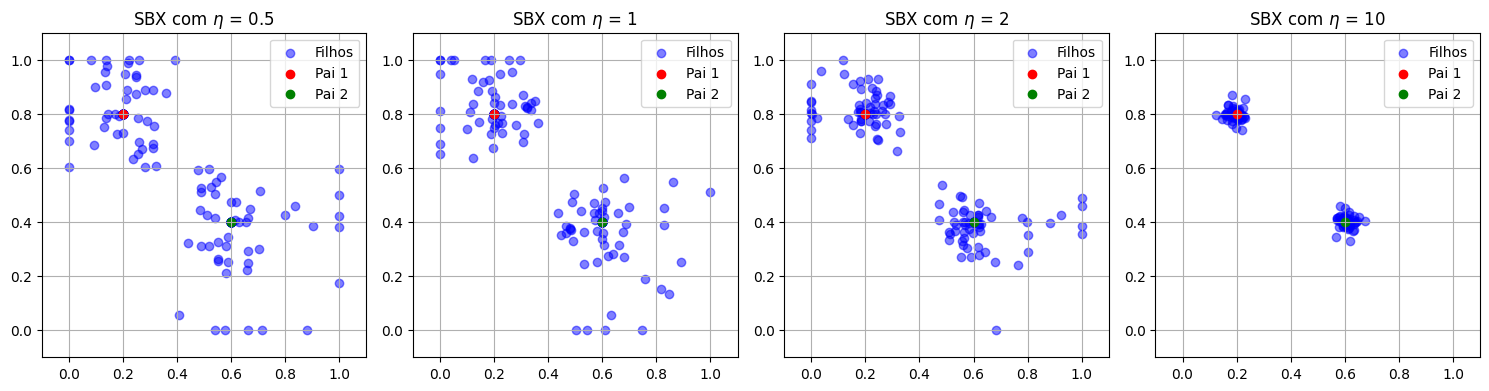

In [1]:
import random
import matplotlib.pyplot as plt

def sbx_crossover(parent1, parent2, eta, low, up):
    """
    Operador de Cruzamento Simulado Binário (SBX)
    Args:
        parent1, parent2: Pais (listas de valores)
        eta: Parâmetro de controle de distribuição
        low, up: Limites inferiores e superiores (listas)
    Returns:
        child1, child2: Filhos gerados pelo cruzamento
    """
    size = len(parent1)
    child1, child2 = parent1.copy(), parent2.copy()
    
    if random.random() <= 0.5:  # Probabilidade de aplicar cruzamento
        for i in range(size):
            u = random.random() 
            if u < 0.5:
                beta_q = (2 * u)**(1 / (eta + 1)) 
            else:
                beta_q = (1 / (2 * (1 - u)))**(1 / (eta + 1))
            
            child1[i] = 0.5 * ((1 + beta_q) * parent1[i] + (1 - beta_q) * parent2[i])
            child2[i] = 0.5 * ((1 - beta_q) * parent1[i] + (1 + beta_q) * parent2[i])
            
            # Limitação dos valores ao intervalo [low, up]
            child1[i] = min(max(child1[i], low[i]), up[i])
            child2[i] = min(max(child2[i], low[i]), up[i])
    
    return child1, child2

# Parâmetros para demonstração
parent1 = [0.2, 0.8]
parent2 = [0.6, 0.4]
low = [0.0, 0.0]
up = [1.0, 1.0]

etas = [0.5, 1, 2, 10]  # Diferentes valores de eta para testar

# Visualização gráfica
fig, axes = plt.subplots(1, len(etas), figsize=(15, 5))

for ax, eta in zip(axes, etas):
    children = [sbx_crossover(parent1, parent2, eta, low, up) for _ in range(100)]
    
    # Separar coordenadas dos filhos para plotagem
    children_x = [child[0][0] for child in children] + [child[1][0] for child in children]
    children_y = [child[0][1] for child in children] + [child[1][1] for child in children]
        
    ax.scatter(children_x, children_y, color='blue', alpha=0.5, label='Filhos')
    ax.scatter(parent1[0], parent1[1], color='red', label='Pai 1')
    ax.scatter(parent2[0], parent2[1], color='green', label='Pai 2')
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_aspect('equal')
    ax.set_title(f'SBX com $\\eta$ = {eta}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

### Intuição do fator β no SBX

No operador **SBX (Simulated Binary Crossover)**, o fator β controla quão longe os filhos ficam em relação aos pais. Quando $u$ está próximo de 0.5, β ≈ 1, os filhos se posicionam perto da média dos pais, caracterizando **exploração local**. Se $u$ é pequeno, β < 1, os filhos ficam entre os pais, mantendo-se em uma região restrita. Já quando $u \to 1$, β tende ao infinito, o que permite que os filhos sejam gerados **muito além do intervalo definido pelos pais**. Essa possibilidade, embora rara, é fundamental: garante que o crossover não fique limitado apenas à vizinhança dos pais, introduzindo diversidade na população e abrindo espaço para **exploração global**. O parâmetro $\eta_c$ regula a frequência desse comportamento: valores pequenos de $\eta_c$ aumentam a chance de β grande (mais filhos extremos), enquanto valores grandes de $\eta_c$ concentram β próximo de 1, favorecendo a exploração local e refinamento das soluções. Assim, o limite $\beta \to \infty$ não é um problema numérico, mas sim um **mecanismo de desenho** que equilibra, de forma probabilística, a busca local e global no espaço de soluções.

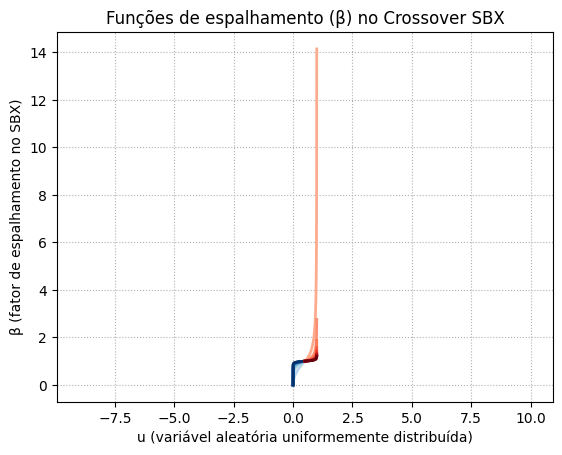

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Famílias de funções para o operador SBX
beta_left_family = [
    lambda u, eta=eta: (2 * u)**(1 / (eta + 1)) 
    for eta in np.linspace(1, 30, 10)
]

beta_right_family = [
    lambda u, eta=eta: (1 / (2 * (1 - u)))**(1 / (eta+1))
    for eta in np.linspace(1, 30, 10)
]

# Domínios de u
u_left = np.linspace(0, 0.5, 200, endpoint=False)   # evita pegar exatamente 0.5
u_right = np.linspace(0.5, 1, 200, endpoint=False)  # evita pegar 1

# Gradiente de cores
colors_left = plt.colormaps.get("Blues")(np.linspace(0.3, 1, len(beta_left_family)))
colors_right = plt.colormaps.get("Reds")(np.linspace(0.3, 1, len(beta_right_family)))

# Plot funções para u < 0.5
for f, c in zip(beta_left_family, colors_left):
    β = f(u_left)
    plt.plot(u_left, β, color=c, linewidth=2)

# Plot funções para u >= 0.5
for f, c in zip(beta_right_family, colors_right):
    β = f(u_right)
    plt.plot(u_right, β, color=c, linewidth=2)

plt.xlabel("u (variável aleatória uniformemente distribuída)")
plt.ylabel("β (fator de espalhamento no SBX)")
plt.title("Funções de espalhamento (β) no Crossover SBX")
plt.grid(True, linestyle=":")
plt.axis("equal")
plt.show()
